In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

aryankatiyar15_bctumor_path = kagglehub.dataset_download('aryankatiyar15/bctumor')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/bctumor'):
    pass
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#1. COUNT OF BENIGN AND MALIGNANT IMAGES FROM THE TEST DATASET 

#2. DATA AUGMENTATION PERFORMED ON TEST DATASET

#3. RANDOM CROP AND NORMALIZATION PERFORMED ON TRAIN AND VALIDATION DATASET 


Total Benign Images: 5559
Total Malignant Images: 14875


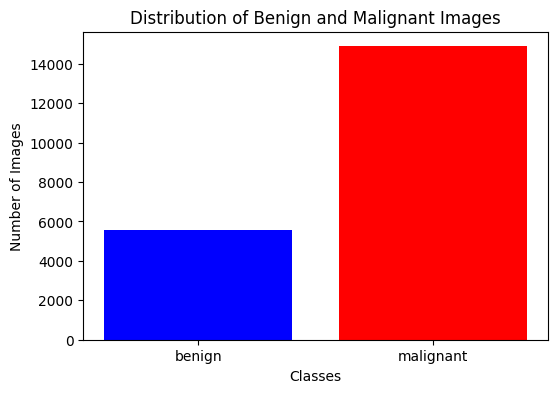

Augmented Images from Training Set:


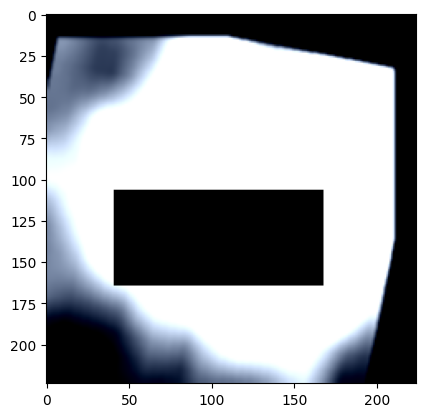

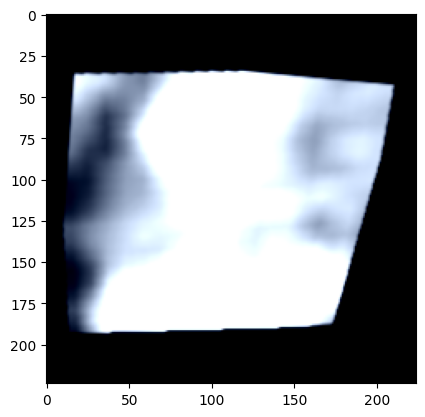

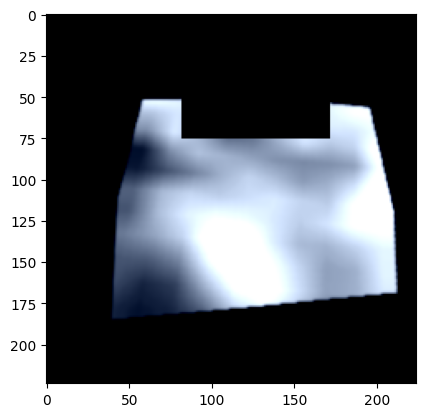

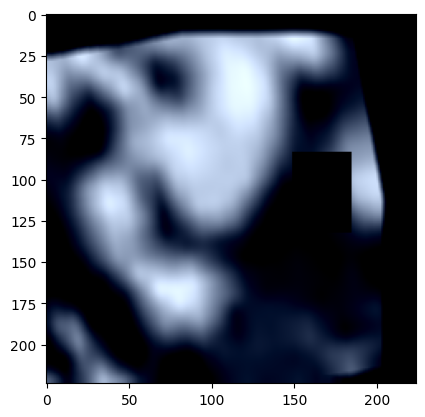

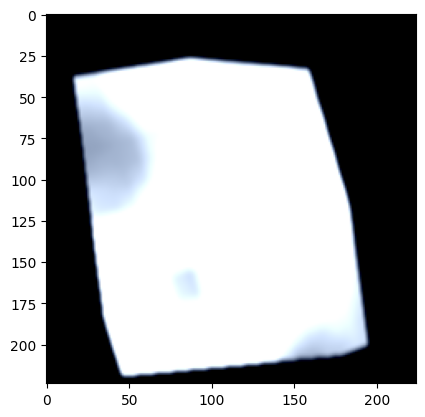

In [ ]:
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

from torch.utils.data import DataLoader

from collections import Counter

import numpy as np

import torch



# Define transformations for the training set (with data augmentation)

train_transform = transforms.Compose([

    transforms.RandomResizedCrop(224),         # Randomly crop the image and resize to 224x224

    transforms.RandomHorizontalFlip(),         # Randomly flip the images horizontally

    transforms.RandomVerticalFlip(),           # Randomly flip the images vertically

    transforms.RandomRotation(20),             # Rotate the images by up to 20 degrees

    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Add random color jitter

    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Randomly translate the image

    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # Random perspective transformation

    transforms.ToTensor(),               # Convert the image to a PyTorch tensor

    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)), # Apply Gaussian blur with random kernel

    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2)),         # Randomly erase a portion of the image (applied to tensor)

    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet

])



# Define transformations for test and validation sets (only resize and normalization)

test_val_transform = transforms.Compose([

    transforms.Resize((224, 224)),       # Resize the image to 224x224

    transforms.ToTensor(),               # Convert the image to a PyTorch tensor

    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet

])



# Path to subfolders

train_dir = '/kaggle/input/bctumor/train'
val_dir = '/kaggle/input/bctumor/val'
test_dir = '/kaggle/input/bctumor/test'




# Load the datasets using ImageFolder

train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=test_val_transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=test_val_transform)


# Count the total number of images in each class for the training dataset

class_counts = Counter(train_dataset.targets)



benign_count = class_counts[train_dataset.class_to_idx['Benign']]

malignant_count = class_counts[train_dataset.class_to_idx['Malignant']]



# Print the counts

print(f"Total Benign Images: {benign_count}")

print(f"Total Malignant Images: {malignant_count}")



# Plotting the graph between total number of benign and malignant images

plt.figure(figsize=(6, 4))

plt.bar(['benign', 'malignant'], [benign_count, malignant_count], color=['blue', 'red'])

plt.title('Distribution of Benign and Malignant Images')

plt.xlabel('Classes')

plt.ylabel('Number of Images')

plt.show()



# Visualizing some augmented images from the training dataset

def imshow(img):

    img = img / 2 + 0.5  # unnormalize the image (after normalization in transform)

    np_img = img.numpy()

    plt.imshow(np.transpose(np_img, (1, 2, 0)))  # convert from tensor to image

    plt.show()



# Create DataLoader for augmented image visualization (from training dataset)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)



# Get a batch of images from the train dataloader

data_iter = iter(train_loader)

images, labels = next(data_iter)



# Show a few augmented images from training set

print("Augmented Images from Training Set:")

for i in range(5):  # Display first 5 images from the batch

    imshow(images[i])



# Create DataLoader for test and validation datasets (no augmentation, only resize and normalization)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


#Importing Libraries

In [ ]:
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

from torch.utils.data import DataLoader

from collections import Counter

import numpy as np

import torch


#Plotting Frequency Vs Pixal Value Graph

Image mode: L
Image shape: (15, 16)
Unique pixel values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  36  37
  39  41  43  44  45  46  48  49  50  51  52  53  54  65  66  71  74  78
  83  88  89  90  93 100 101 103 104 105 106 107 110 112 121 123 124 125
 129 136 139 149 156 165]
Counts for each pixel value: [ 8  3 11  4  7 10  9 10  8 10 11  4  5  8  9  7  7  3  5  3  4  5  5  2
  2  3  6  2  3  2  1  1  1  1  3  1  2  2  1  2  1  5  1  1  1  1  3  1
  1  1  1  3  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  2  1  1
  2  1  1  1  1  1]


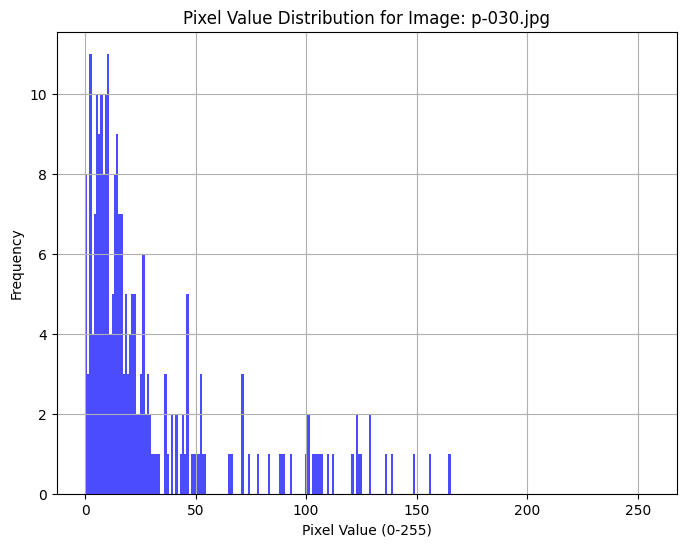

In [ ]:
import os

import matplotlib.pyplot as plt

import numpy as np

from PIL import Image



# Define the path to the specific image

image_path = '/kaggle/input/bctumor/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg'  # Ensure this path is correct



# Load the image and convert to grayscale (if not already)

image = Image.open(image_path).convert('L')  # Ensure grayscale conversion



# Print image mode to check if it's correctly converted to grayscale

print(f"Image mode: {image.mode}")



# Convert the image to a NumPy array

image_array = np.array(image)



# Print image shape to check the dimensions of the image

print(f"Image shape: {image_array.shape}")



# Flatten the image into a 1D array for easier plotting

flat_image_array = image_array.flatten()



# Print unique pixel values to see the actual pixel distribution

unique_pixel_values, counts = np.unique(flat_image_array, return_counts=True)

print(f"Unique pixel values: {unique_pixel_values}")

print(f"Counts for each pixel value: {counts}")



# Plotting the histogram of pixel values with optional smoothing

plt.figure(figsize=(8, 6))



# Use fewer bins (e.g., 128) if the histogram is too sparse

plt.hist(flat_image_array, bins=256, range=(0, 255), color='blue', alpha=0.7)



# Set plot labels and title

plt.title(f'Pixel Value Distribution for Image: {os.path.basename(image_path)}')

plt.xlabel('Pixel Value (0-255)')

plt.ylabel('Frequency')

plt.grid(True)



# Show the plot

plt.show()


#implementing HOG on an Image

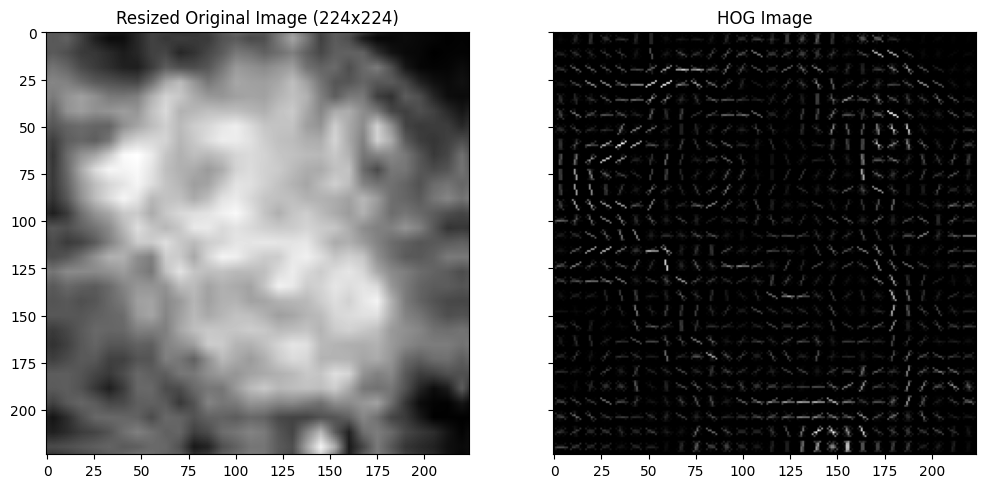

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog

from skimage.io import imread

from skimage.color import rgb2gray

from skimage.transform import resize



# Read image

image = imread('/kaggle/input/bctumor/test/Malignant/BreaDM-Ma-1916/SUB7/p-039.jpg')



# Resize image to 224x224

image_resized = resize(image, (224, 224))



# Convert image to grayscale if it has multiple channels (e.g., RGB)

if len(image_resized.shape) > 2:

    image_resized = rgb2gray(image_resized)



# Compute HOG features and HOG image

hog_features, hog_image = hog(image_resized,

                              orientations=9,

                              pixels_per_cell=(8, 8),

                              cells_per_block=(2, 2),

                              block_norm='L2-Hys',

                              visualize=True)



# Visualize the original and HOG images

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)



ax[0].imshow(image_resized, cmap='gray')

ax[0].set_title('Resized Original Image (224x224)')



ax[1].imshow(hog_image, cmap='gray')

ax[1].set_title('HOG Image')



plt.show()


#Performing Convolution on an image

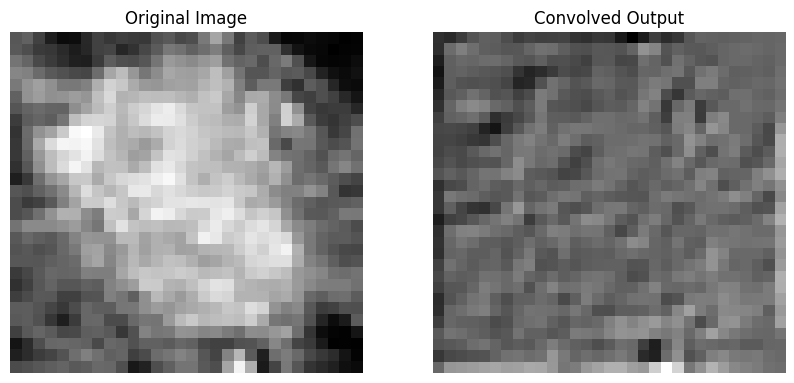

In [ ]:
import cv2

import numpy as np

import matplotlib.pyplot as plt



# Define the kernel for convolution

kernel = np.array([

    [1, 0],

    [0, -1]

])



# Function to perform convolution on an image

def convolve(image, kernel, stride=1, padding=0):

    image_x, image_y = image.shape

    kernel_x, kernel_y = kernel.shape



    # Apply padding if required

    if padding > 0:

        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)



    # Update image dimensions after padding

    padded_image_x, padded_image_y = image.shape



    # Output dimensions

    output_x = int(((padded_image_x - kernel_x) // stride) + 1)

    output_y = int(((padded_image_y - kernel_y) // stride) + 1)



    # Create an output array

    output = np.zeros((output_x, output_y))



    # Perform convolution

    for i in range(0, output_x):

        for j in range(0, output_y):

            # Extract the region of the image corresponding to the kernel

            region = image[i * stride:i * stride + kernel_x, j * stride:j * stride + kernel_y]

            # Apply the convolution (element-wise multiplication and summing)

            output[i, j] = np.sum(region * kernel)



    return output



# Function to display the original and convolved images

def display_images(original, convolved):

    plt.figure(figsize=(10, 5))



    # Display original image

    plt.subplot(1, 2, 1)

    plt.title("Original Image")

    plt.imshow(original, cmap='gray')

    plt.axis('off')



    # Display convolved image

    plt.subplot(1, 2, 2)

    plt.title("Convolved Output")

    plt.imshow(convolved, cmap='gray')

    plt.axis('off')



    plt.show()



# Load a single image from your dataset (using OpenCV in this case)

image_path = '/kaggle/input/bctumor/test/Malignant/BreaDM-Ma-1916/SUB7/p-039.jpg'  # Replace with your image path

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale



# Convolution with padding = 1

convolved_output = convolve(image, kernel, stride=1, padding=1)



# Display original and convolved images

display_images(image, convolved_output)


#Implementing LBP on an image

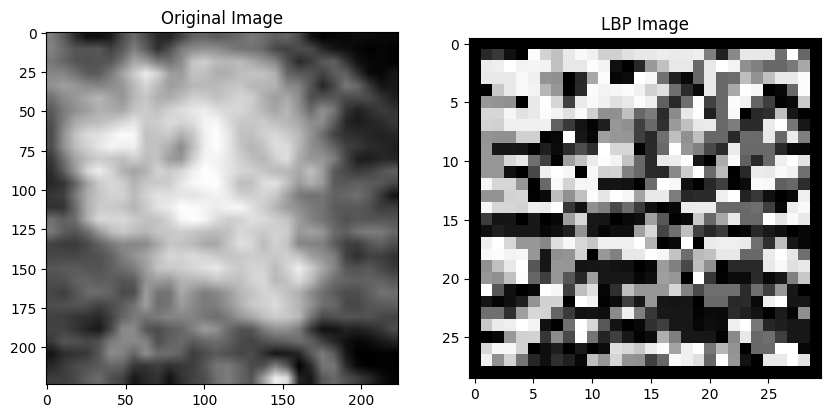

In [ ]:
import cv2

import numpy as np

import matplotlib.pyplot as plt



def calculate_lbp(gray_image):

    """

    Function to calculate the Local Binary Pattern (LBP) of a grayscale image.



    == Input ==

    gray_image: A grayscale image as a 2D NumPy array



    == Output ==

    img_lbp: LBP image of the same size

    """



    # Initialize the output LBP image with zeros

    img_lbp = np.zeros_like(gray_image)



    # Define the 3x3 neighborhood size

    neighboor = 3



    # Loop through each pixel (excluding the border pixels)

    for ih in range(1, gray_image.shape[0] - 1):

        for iw in range(1, gray_image.shape[1] - 1):

            # Extract the 3x3 block of pixels centered at (ih, iw)

            block = gray_image[ih-1:ih+2, iw-1:iw+2]



            # Get the center pixel value

            center = block[1, 1]



            # Perform binary comparison and compute LBP value

            binary_pattern = (block >= center).astype(np.uint8)

            binary_pattern[1, 1] = 0  # Ignore the center pixel itself



            # Flatten and convert the binary pattern to a decimal value

            lbp_value = binary_pattern.flatten()

            lbp_value = np.delete(lbp_value, 4)  # Remove center pixel value

            lbp_decimal = np.sum(lbp_value * (2**np.arange(8)))



            # Store the LBP value in the output image

            img_lbp[ih, iw] = lbp_decimal



    return img_lbp





# Load a sample image and convert it to grayscale

image = cv2.imread('/kaggle/input/bctumor/test/Malignant/BreaDM-Ma-1916/SUB7/p-038.jpg')  # Replace with the path to your image

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



# Resize the image to 224x224 pixels

image = cv2.resize(image, (224, 224))



# Calculate the LBP of the image

lbp_image = calculate_lbp(gray_image)



# Display the original and LBP images

plt.figure(figsize=(10, 5))



# Original color image

plt.subplot(1, 2, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display

plt.title('Original Image')



# LBP image (grayscale)

plt.subplot(1, 2, 2)

plt.imshow(lbp_image, cmap='gray')

plt.title('LBP Image')



plt.show()


#Implementing Histogram graph of all mean,median, varience (LBP) implemented image

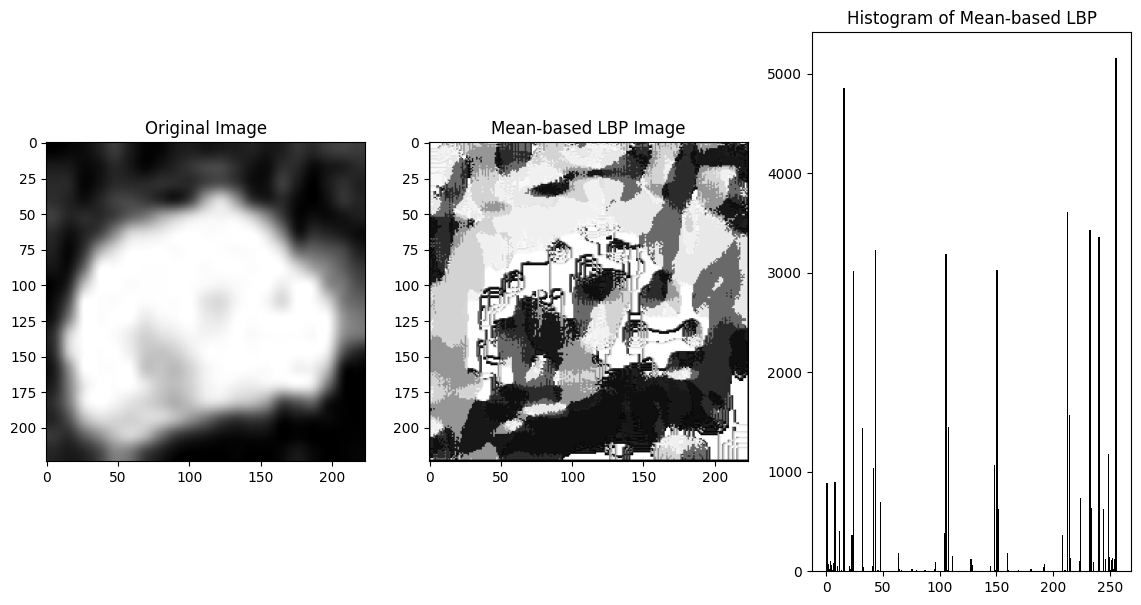

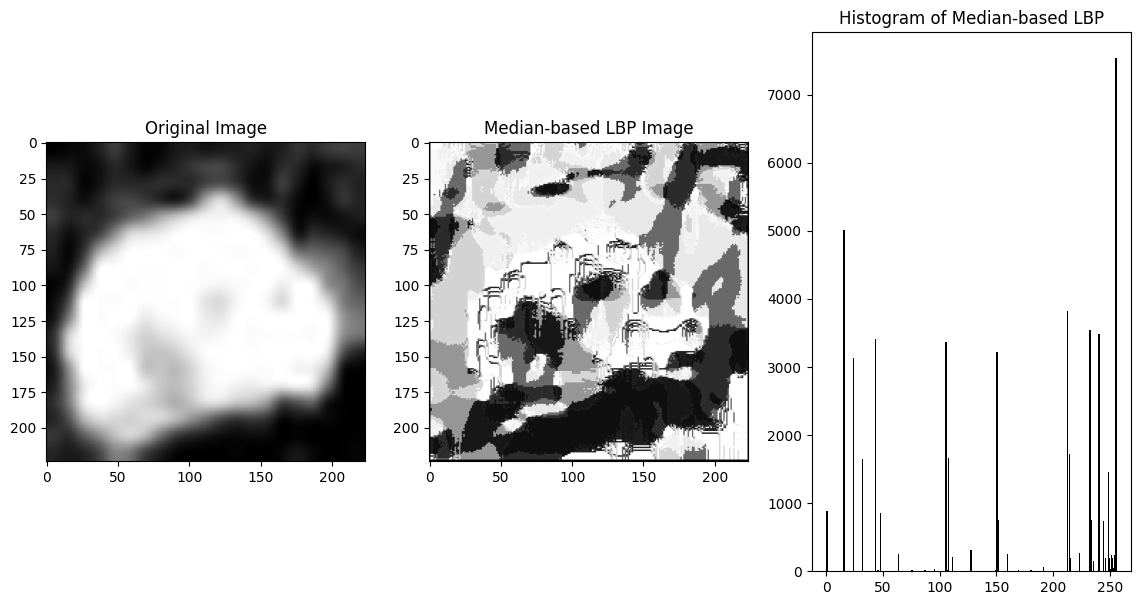

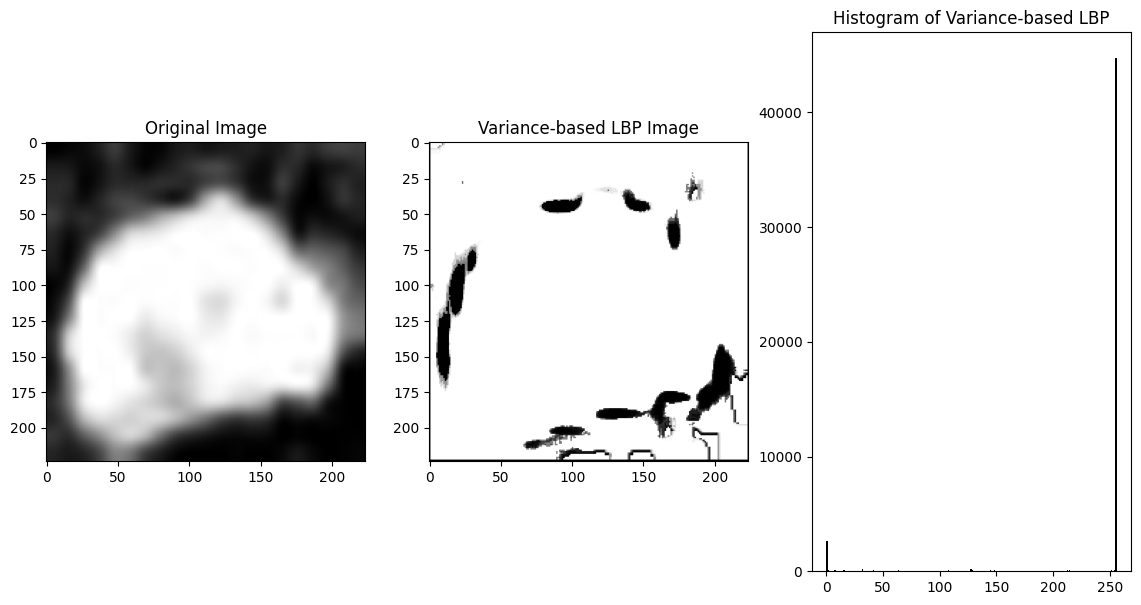

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image



def mean_based_lbp(image_path):

    image = Image.open(image_path).convert('L').resize((224, 224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            mean_value = (np.sum(neighborhood) - center_pixel) / 8

            surrounding_pixels = np.delete(neighborhood.flatten(), 4)

            binary_pattern = (surrounding_pixels >= mean_value).astype(int)

            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()



    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(14, 7))

    plt.subplot(1, 3, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 3, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('Mean-based LBP Image')

    plt.subplot(1, 3, 3)

    plt.hist(lbp_image_normalized.ravel(), bins=256, range=(0, 256), color='black')

    plt.title('Histogram of Mean-based LBP')

    plt.show()



def median_based_lbp(image_path):

    image = Image.open(image_path).convert('L').resize((224, 224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            median_value = np.median(np.delete(neighborhood.flatten(), 4))

            surrounding_pixels = np.delete(neighborhood.flatten(), 4)

            binary_pattern = (surrounding_pixels >= median_value).astype(int)

            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()



    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(14, 7))

    plt.subplot(1, 3, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 3, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('Median-based LBP Image')

    plt.subplot(1, 3, 3)

    plt.hist(lbp_image_normalized.ravel(), bins=256, range=(0, 256), color='black')

    plt.title('Histogram of Median-based LBP')

    plt.show()



def variance_based_lbp(image_path):

    image = Image.open(image_path).convert('L').resize((224, 224))

    img_array = np.array(image)

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            variance_value = np.var(np.delete(neighborhood.flatten(), 4))

            surrounding_pixels = np.delete(neighborhood.flatten(), 4)

            binary_pattern = (surrounding_pixels >= variance_value).astype(int)

            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()



    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255



    plt.figure(figsize=(14, 7))

    plt.subplot(1, 3, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title('Original Image')

    plt.subplot(1, 3, 2)

    plt.imshow(lbp_image_normalized, cmap='gray')

    plt.title('Variance-based LBP Image')

    plt.subplot(1, 3, 3)

    plt.hist(lbp_image_normalized.ravel(), bins=256, range=(0, 256), color='black')

    plt.title('Histogram of Variance-based LBP')

    plt.show()


# Example usage

image_path = '/kaggle/input/bctumor/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg'

mean_based_lbp(image_path)

median_based_lbp(image_path)

variance_based_lbp(image_path)


#Now implementing on 5 images 

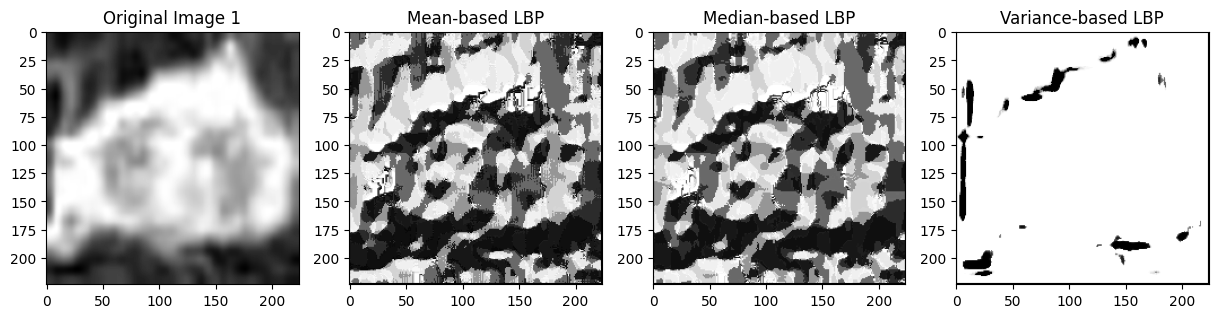

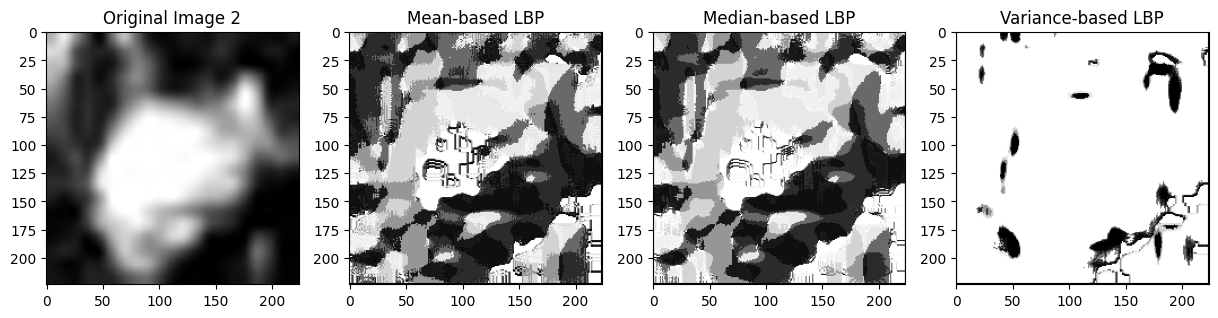

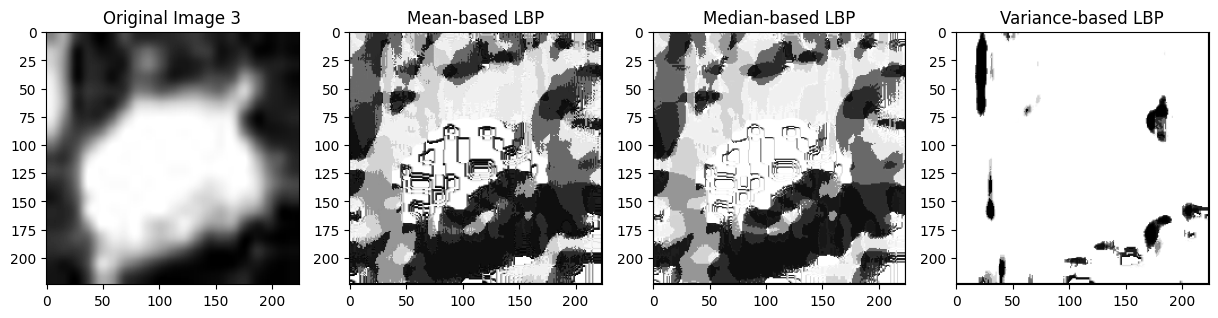

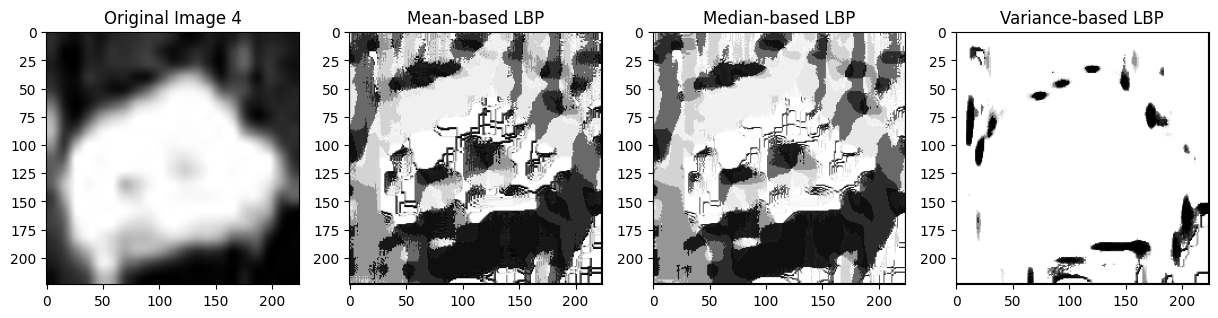

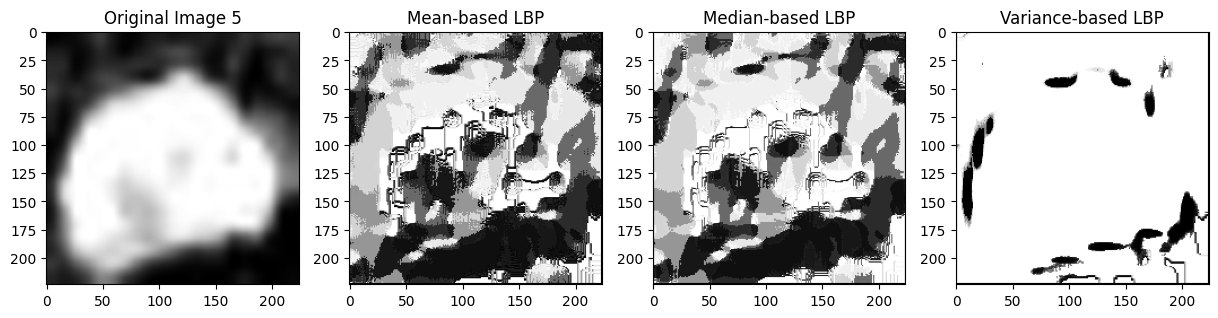

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image



def mean_based_lbp(img_array):

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            mean_value = (np.sum(neighborhood) - center_pixel) / 8

            surrounding_pixels = np.delete(neighborhood.flatten(), 4)

            binary_pattern = (surrounding_pixels >= mean_value).astype(int)

            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()



    return (lbp_image / lbp_image.max()) * 255



def median_based_lbp(img_array):

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            median_value = np.median(np.delete(neighborhood.flatten(), 4))

            surrounding_pixels = np.delete(neighborhood.flatten(), 4)

            binary_pattern = (surrounding_pixels >= median_value).astype(int)

            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()



    return (lbp_image / lbp_image.max()) * 255



def variance_based_lbp(img_array):

    rows, cols = img_array.shape

    lbp_image = np.zeros((rows, cols), dtype=np.uint8)



    for i in range(1, rows - 1):

        for j in range(1, cols - 1):

            neighborhood = img_array[i-1:i+2, j-1:j+2]

            center_pixel = img_array[i, j]

            variance_value = np.var(np.delete(neighborhood.flatten(), 4))

            surrounding_pixels = np.delete(neighborhood.flatten(), 4)

            binary_pattern = (surrounding_pixels >= variance_value).astype(int)

            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()



    return (lbp_image / lbp_image.max()) * 255



# List of image paths

image_paths = [

    '/kaggle/input/bctumor/train/Malignant/BreaDM-Ma-2127/SUB7/p-049.jpg',

    '/kaggle/input/bctumor/train/Malignant/BreaDM-Ma-1815/SUB3/p-047.jpg',

    '/kaggle/input/bctumor/train/Malignant/BreaDM-Ma-1815/SUB3/p-048.jpg',

    '/kaggle/input/bctumor/train/Malignant/BreaDM-Ma-1815/SUB3/p-049.jpg',

    '/kaggle/input/bctumor/train/Malignant/BreaDM-Ma-1815/SUB3/p-050.jpg'

]



# Processing and displaying all images

for idx, image_path in enumerate(image_paths):

    image = Image.open(image_path).convert('L').resize((224, 224))

    img_array = np.array(image)



    mean_lbp = mean_based_lbp(img_array)

    median_lbp = median_based_lbp(img_array)

    variance_lbp = variance_based_lbp(img_array)



    plt.figure(figsize=(15, 5))



    plt.subplot(1, 4, 1)

    plt.imshow(img_array, cmap='gray')

    plt.title(f'Original Image {idx+1}')



    plt.subplot(1, 4, 2)

    plt.imshow(mean_lbp, cmap='gray')

    plt.title('Mean-based LBP')



    plt.subplot(1, 4, 3)

    plt.imshow(median_lbp, cmap='gray')

    plt.title('Median-based LBP')



    plt.subplot(1, 4, 4)

    plt.imshow(variance_lbp, cmap='gray')

    plt.title('Variance-based LBP')



    plt.show()


#GLCM Matrix calculation


In [ ]:
import numpy as np



def calculate_horizontal_glcm(matrix, distance=1):



    max_gray_level = np.max(matrix) + 1

    glcm = np.zeros((max_gray_level, max_gray_level), dtype=int)



    rows, cols = matrix.shape



    for i in range(rows):

        for j in range(cols - distance):

            current_pixel = matrix[i, j]

            neighbor_pixel = matrix[i, j + distance]





            glcm[current_pixel, neighbor_pixel] += 1



    return glcm



# Example input matrix

input_matrix = np.array([

    [0, 1, 2, 3],

    [1, 0, 3, 2],

    [2, 3, 0, 1],

    [3, 2, 1, 0]

])



# Calculate the horizontal GLCM for the given input matrix

glcm_matrix = calculate_horizontal_glcm(input_matrix, distance=1)

print("Horizontal GLCM Matrix:\n", glcm_matrix)


Horizontal GLCM Matrix:
 [[0 2 0 1]
 [2 0 1 0]
 [0 1 0 2]
 [1 0 2 0]]


#VGG16 model

In [ ]:
import torch



import torchvision.models as models



vgg16 = models.vgg16(pretrained=True)



vgg16.eval()



print(vgg16)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:10<00:00, 54.4MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
import torch

import torch.nn as nn

from torchvision import models



class CustomVGG16(nn.Module):

    def __init__(self, num_classes=2):

        # Initialize the parent class

        super(CustomVGG16, self).__init__()



        # Load the pre-trained VGG16 model

        vgg16 = models.vgg16(pretrained=True)



        # Extract the features and avgpool layers

        self.features = vgg16.features

        self.avgpool = vgg16.avgpool



        # Define a new classifier using nn.Sequential

        self.classifier = nn.Sequential(

            nn.Linear(512 * 7 * 7, 4096),  # First linear layer

            nn.ReLU(),                     # ReLU activation

            nn.Dropout(),                  # Dropout layer

            nn.Linear(4096, 4096),         # Second linear layer

            nn.ReLU(),                     # ReLU activation

            nn.Dropout(),                  # Dropout layer

            nn.Linear(4096, num_classes)   # Final linear layer for binary classification

        )



    def forward(self, x):

        # Pass the input through the features layer

        x = self.features(x)



        # Use the avgpool layer and reshape the output to a 2D tensor

        x = self.avgpool(x)

        x = torch.flatten(x, 1)  # Flatten the tensor (batch_size, num_features)



        # Pass the reshaped output to the custom classifier

        x = self.classifier(x)



        return x



# Example of creating an instance of CustomVGG16

model = CustomVGG16(num_classes=2)


#early stopping

In [ ]:
import numpy as np

import torch



class EarlyStopping:

    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):

        """

        Early stops the training if validation loss doesn't improve after a given patience.



        Parameters:

        - patience (int): How long to wait after the last time validation loss improved.

        - verbose (bool): If True, prints a message for each validation loss improvement.

        - delta (float): Minimum change in the monitored quantity to qualify as an improvement.

        - path (str): Path for saving the model checkpoint.

        - trace_func (function): Function to print messages; can be set to print/logging.

        """

        self.patience = patience

        self.verbose = verbose

        self.delta = delta

        self.path = path

        self.trace_func = trace_func

        self.counter = 0

        self.best_score = None

        self.early_stop = False

        self.val_loss_min = np.Inf



    def __call__(self, val_loss, model):

        """

        Call this function to check if the validation loss has improved.

        If not improved, increment the counter. If improved, reset counter and save model.



        Parameters:

        - val_loss (float): Current validation loss.

        - model (torch.nn.Module): Model to save if validation loss decreases.

        """

        score = -val_loss

        if self.best_score is None:

            self.best_score = score

            self.save_checkpoint(val_loss, model)

        elif score < self.best_score + self.delta:

            self.counter += 1

            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')

            if self.counter >= self.patience:

                self.early_stop = True

        else:

            self.best_score = score

            self.save_checkpoint(val_loss, model)

            self.counter = 0



    def save_checkpoint(self, val_loss, model):

        """Saves model when validation loss decreases."""

        if self.verbose:

            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model ...')

        torch.save(model.state_dict(), self.path)

        self.val_loss_min = val_loss


In [ ]:
test_transforms = transforms.Compose([
    transforms.Resize(224),                    # Resize the image to 256x256
    transforms.CenterCrop(224),                # Center crop to 224x224
    transforms.ToTensor(),                     # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize with ImageNet mean and std
])

#Loading the dataset


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations (resize and normalization only, no augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),         # Resize the image to 224x224
    transforms.ToTensor(),                 # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet
])

# Replace BreastCancerDataset with ImageFolder for loading datasets
train_dir = '/kaggle/input/bctumor/train'
val_dir = '/kaggle/input/bctumor/val'
test_dir = '/kaggle/input/bctumor/test'

# Load datasets using ImageFolder
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders for each dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Now your datasets are ready for use


# Training VGG 16 Model


In [ ]:
import torch



import torch.nn.functional as F



from tqdm import tqdm



import torch.optim as optim



from tqdm import tqdm

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



model = model.to(device)

#TRAIN FUNCTION

In [ ]:
import torch
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F

epoch = 0
total_epochs = 50
loader = train_loader  # Ensure this is a DataLoader instance for training data
criterion = nn.CrossEntropyLoss()
l2_decay = 0.01
lr = 0.01  # Learning rate

def train(epoch, model, total_epochs, loader, criterion, l2_decay):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    # Rest of the code...



    model.train()

    correct = 0
    for data, label in tqdm(loader, desc=f'Epoch {epoch+1}/{total_epochs}', unit='batch'):
        #data = data.float().cuda()

        #label = label.long().cuda()
        data = data.float().to(device)
        label = label.long().to(device)

        output = model(data)
        optimizer.zero_grad()
        loss = F.nll_loss(F.log_softmax(output, dim=1), label)
        loss.backward()
        optimizer.step()

        pred = output.data.max(1)[1]
        correct += pred.eq(label.data.view_as(pred)).cpu().sum()

    print(f'train accuracy: {100. * correct / len(loader.dataset)}%')



#VALIDATION FUNCTION


In [ ]:
import torch
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc as compute_auc
import torch.nn.functional as F

def validation(model, val_loader):
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    correct = 0
    all_predictions = []  # Store all predictions
    all_targets = []      # Store all targets
    possibilities = None  # Store probabilities for AUC

    for data, target in val_loader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

        val_output = model(data)

        # Calculate test loss
        test_loss += F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()

        # Get predictions and accumulate them
        pred = val_output.data.max(1)[1]
        all_predictions.extend(pred.cpu().numpy())  # Collect all predictions
        all_targets.extend(target.cpu().numpy())    # Collect all target labels

        # Calculate probabilities for AUC
        possibility = F.softmax(val_output, dim=1).cpu().detach().numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)

        # Calculate the number of correct predictions
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    # Compute confusion matrix
    cm = metrics.confusion_matrix(all_targets, all_predictions)

    # One-hot encode the labels for AUC computation
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = compute_auc(fpr, tpr)  # Use renamed function here

    # Average test loss per sample
    test_loss /= len(val_loader.dataset)

    # Calculate sensitivity and specificity
    specificity = 1 - fpr[1] if len(fpr) > 1 else 0
    sensitivity = tpr[1] if len(tpr) > 1 else 0

    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(specificity, sensitivity, auc_value))
    print('\nTest set: Average loss: {:.4f}, Accuracy: {:.2f}%\n'.format(test_loss, 100. * correct / len(val_loader.dataset)))

    return test_loss, 100. * correct / len(val_loader.dataset), cm, auc_value

In [ ]:
total_epochs = 50

lr = 0.01

momentum = 0.9

no_cuda = False

num_classes=2

log_interval = 10

l2_decay = 0.01

model = CustomVGG16(num_classes=num_classes)

model = model.to(device)

CustomVGG16(num_classes=num_classes)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


CustomVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, di

In [ ]:
# please make sure you are using variables that match your own environment.

# model training on Validation

model.to(device)  # here device is cuda
best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)
project_name = 'tumor_classfication'
model_name = 'vgg16'

# we will be using epochs. epochs will be defined in another code block.

for epoch in range(1, total_epochs + 1):

      #train(epoch, model)#train(epoch, total_epochs, train_loader, criterion, l2_decay, lr)

    train(epoch, model, total_epochs, train_loader, criterion, l2_decay)

    with torch.no_grad():

        test_loss,_,_, auc = validation(model , val_loader)

        #accuracy, test_loss, auc_value = test(model, test_loader)
        #print(f"Test Accuracy: {accuracy:.2f}%, Loss: {test_loss:.4f}, AUC: {auc_value:.4f}")


    # making sure that the model can run on multiple GPUs

    dict = model.module.state_dict() if isinstance(model, nn.parallel.DistributedDataParallel) else model.state_dict()

    model_save_dir = os.path.join('model', project_name, model_name)

    if not os.path.exists(model_save_dir):

        os.makedirs(model_save_dir)

    early_stop(test_loss, model)

    if auc > best_accuracy:

        best_accuracy = auc

        #torch.save(os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'), _use_new_zipfile_serialization=False)
        torch.save(dict, os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'), _use_new_zipfile_serialization=False)

    if early_stop.early_stop:

        print("Early stopping")

        break



Epoch 2/50: 100%|██████████| 639/639 [04:50<00:00,  2.20batch/s]


train accuracy: 84.44259643554688%
Specificity: 1.0000, Sensitivity: 0.0101, AUC: 0.9192

Test set: Average loss: 0.3461, Accuracy: 81.30%

Validation loss decreased (inf --> 0.346125). Saving model ...


Epoch 3/50: 100%|██████████| 639/639 [03:17<00:00,  3.24batch/s]


train accuracy: 90.40814208984375%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8745

Test set: Average loss: 0.4374, Accuracy: 76.57%

EarlyStopping counter: 1 out of 20


Epoch 4/50: 100%|██████████| 639/639 [03:16<00:00,  3.25batch/s]


train accuracy: 90.92198944091797%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8659

Test set: Average loss: 0.4618, Accuracy: 76.02%

EarlyStopping counter: 2 out of 20


Epoch 5/50: 100%|██████████| 639/639 [03:20<00:00,  3.19batch/s]


train accuracy: 92.33140563964844%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8730

Test set: Average loss: 0.4737, Accuracy: 76.72%

EarlyStopping counter: 3 out of 20


Epoch 6/50: 100%|██████████| 639/639 [03:21<00:00,  3.18batch/s]


train accuracy: 92.71312713623047%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9151

Test set: Average loss: 0.3882, Accuracy: 82.00%

EarlyStopping counter: 4 out of 20


Epoch 7/50: 100%|██████████| 639/639 [03:16<00:00,  3.25batch/s]


train accuracy: 93.69677734375%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8963

Test set: Average loss: 0.4005, Accuracy: 79.14%

EarlyStopping counter: 5 out of 20


Epoch 8/50: 100%|██████████| 639/639 [03:17<00:00,  3.24batch/s]


train accuracy: 94.07360076904297%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8835

Test set: Average loss: 0.4601, Accuracy: 78.48%

EarlyStopping counter: 6 out of 20


Epoch 9/50: 100%|██████████| 639/639 [03:17<00:00,  3.23batch/s]


train accuracy: 94.42595672607422%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8978

Test set: Average loss: 0.4009, Accuracy: 80.19%

EarlyStopping counter: 7 out of 20


Epoch 10/50: 100%|██████████| 639/639 [03:18<00:00,  3.23batch/s]


train accuracy: 94.48468017578125%
Specificity: 1.0000, Sensitivity: 0.1217, AUC: 0.9204

Test set: Average loss: 0.5308, Accuracy: 82.25%

EarlyStopping counter: 8 out of 20


Epoch 11/50: 100%|██████████| 639/639 [03:17<00:00,  3.23batch/s]


train accuracy: 98.82059478759766%
Specificity: 1.0000, Sensitivity: 0.0804, AUC: 0.9286

Test set: Average loss: 0.4507, Accuracy: 83.61%

EarlyStopping counter: 9 out of 20


Epoch 12/50: 100%|██████████| 639/639 [03:17<00:00,  3.24batch/s]


train accuracy: 99.47636413574219%
Specificity: 1.0000, Sensitivity: 0.1111, AUC: 0.9336

Test set: Average loss: 0.4754, Accuracy: 84.26%

EarlyStopping counter: 10 out of 20


Epoch 13/50: 100%|██████████| 639/639 [03:16<00:00,  3.25batch/s]


train accuracy: 99.65743255615234%
Specificity: 1.0000, Sensitivity: 0.0870, AUC: 0.9251

Test set: Average loss: 0.4974, Accuracy: 83.11%

EarlyStopping counter: 11 out of 20


Epoch 14/50: 100%|██████████| 639/639 [03:16<00:00,  3.25batch/s]


train accuracy: 99.75531005859375%
Specificity: 1.0000, Sensitivity: 0.1212, AUC: 0.9164

Test set: Average loss: 0.5832, Accuracy: 82.35%

EarlyStopping counter: 12 out of 20


Epoch 15/50: 100%|██████████| 639/639 [03:17<00:00,  3.24batch/s]


train accuracy: 99.76020050048828%
Specificity: 1.0000, Sensitivity: 0.1202, AUC: 0.9276

Test set: Average loss: 0.5303, Accuracy: 83.51%

EarlyStopping counter: 13 out of 20


Epoch 16/50: 100%|██████████| 639/639 [03:19<00:00,  3.20batch/s]


train accuracy: 99.75041961669922%
Specificity: 1.0000, Sensitivity: 0.1347, AUC: 0.9261

Test set: Average loss: 0.5683, Accuracy: 83.01%

EarlyStopping counter: 14 out of 20


Epoch 17/50: 100%|██████████| 639/639 [03:18<00:00,  3.22batch/s]


train accuracy: 99.72105407714844%
Specificity: 1.0000, Sensitivity: 0.0679, AUC: 0.8993

Test set: Average loss: 0.6361, Accuracy: 80.19%

EarlyStopping counter: 15 out of 20


Epoch 18/50: 100%|██████████| 639/639 [03:16<00:00,  3.26batch/s]


train accuracy: 99.7944564819336%
Specificity: 1.0000, Sensitivity: 0.1166, AUC: 0.9221

Test set: Average loss: 0.5539, Accuracy: 83.06%

EarlyStopping counter: 16 out of 20


Epoch 19/50: 100%|██████████| 639/639 [03:15<00:00,  3.27batch/s]


train accuracy: 99.77488708496094%
Specificity: 1.0000, Sensitivity: 0.1187, AUC: 0.9176

Test set: Average loss: 0.6069, Accuracy: 82.30%

EarlyStopping counter: 17 out of 20


Epoch 20/50: 100%|██████████| 639/639 [03:17<00:00,  3.24batch/s]


train accuracy: 99.76020050048828%
Specificity: 1.0000, Sensitivity: 0.0744, AUC: 0.9182

Test set: Average loss: 0.5491, Accuracy: 83.16%

EarlyStopping counter: 18 out of 20


Epoch 21/50: 100%|██████████| 639/639 [03:17<00:00,  3.24batch/s]


train accuracy: 99.9363784790039%
Specificity: 1.0000, Sensitivity: 0.1071, AUC: 0.9180

Test set: Average loss: 0.5881, Accuracy: 82.05%

EarlyStopping counter: 19 out of 20


Epoch 22/50: 100%|██████████| 639/639 [03:17<00:00,  3.24batch/s]


train accuracy: 99.97063446044922%
Specificity: 1.0000, Sensitivity: 0.1131, AUC: 0.9181

Test set: Average loss: 0.6001, Accuracy: 82.20%

EarlyStopping counter: 20 out of 20
Early stopping


In [ ]:
# Save the model at the final epoch if early stopping is triggered
final_model_save_path = os.path.join(model_save_dir, f'{model_name}_final_epoch.pth')
torch.save(model.state_dict(), final_model_save_path, _use_new_zipfile_serialization=False)
print(f"Final model saved at: {os.path.abspath(final_model_save_path)}")


Final model saved at: /kaggle/working/model/tumor_classfication/vgg16/vgg16_final_epoch.pth


#test function


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import torch
import numpy as np
import torch.nn.functional as F

def test(model, test_loader):
    """
    Function to evaluate the model on the test dataset.

    Parameters:
    - model (torch.nn.Module): The trained model.
    - test_loader (DataLoader): DataLoader for the test dataset.

    Returns:
    - accuracy (float): Test accuracy in percentage.
    - test_loss (float): Average test loss.
    - auc_value (float): AUC score.
    """
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    correct = 0
    possibilities = None
    all_predictions = []
    all_targets = []

    # Iterate through the test DataLoader
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        test_output = model(data)  # Forward pass

        # Compute loss
        test_loss += F.nll_loss(F.log_softmax(test_output, dim=1), target, reduction='sum').item()

        # Get predictions
        pred = test_output.data.max(1)[1]
        all_predictions.extend(pred.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

        # Get probabilities for AUC calculation
        possibility = F.softmax(test_output, dim=1).cpu().data.numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)

        # Count correct predictions
        correct += pred.eq(target.data.view_as(pred)).sum().item()

    # Convert all predictions and targets to numpy arrays
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)

    # Classification metrics
    print(classification_report(all_targets, all_predictions, target_names=['benign', 'malignant'], digits=4))

    # Confusion matrix
    cm = confusion_matrix(all_targets, all_predictions)
    print("Confusion Matrix:\n", cm)

    # AUC score
    num_classes = possibilities.shape[1]
    label_onehot = np.eye(num_classes)[all_targets]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = roc_auc_score(label_onehot, possibilities, average="macro")

    # Average loss and accuracy
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(1 - fpr[0], tpr[0], auc_value))
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))

    return accuracy, test_loss, auc_value, fpr, tpr, cm


In [ ]:
test(model, test_loader)

              precision    recall  f1-score   support

      benign     0.5010    0.3695    0.4253      1938
   malignant     0.7746    0.8549    0.8128      4913

    accuracy                         0.7176      6851
   macro avg     0.6378    0.6122    0.6190      6851
weighted avg     0.6972    0.7176    0.7032      6851

Confusion Matrix:
 [[ 716 1222]
 [ 713 4200]]
Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.6716

Test set: Average loss: 1.7644, Accuracy: 4916/6851 (71.76%)



(71.75594803678295,
 1.7643584101601721,
 0.6716401243347351,
 array([0.        , 0.00525471, 0.00919574, ..., 0.98963655, 0.98963655,
        1.        ]),
 array([0.        , 0.0507955 , 0.0719603 , ..., 0.99985404, 1.        ,
        1.        ]),
 array([[ 716, 1222],
        [ 713, 4200]]))

In [ ]:
test_accuracy, test_loss, test_auc, fpr, tpr, cm = test(model, test_loader)

              precision    recall  f1-score   support

      benign     0.5010    0.3695    0.4253      1938
   malignant     0.7746    0.8549    0.8128      4913

    accuracy                         0.7176      6851
   macro avg     0.6378    0.6122    0.6190      6851
weighted avg     0.6972    0.7176    0.7032      6851

Confusion Matrix:
 [[ 716 1222]
 [ 713 4200]]
Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.6716

Test set: Average loss: 1.7644, Accuracy: 4916/6851 (71.76%)



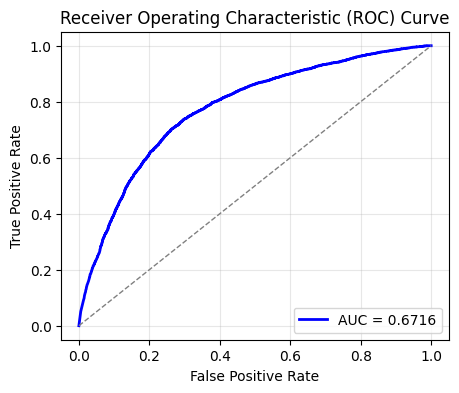

In [ ]:
import matplotlib.pyplot as plt

def plot_auc(fpr, tpr, auc_value):
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

plot_auc(fpr, tpr, test_auc)

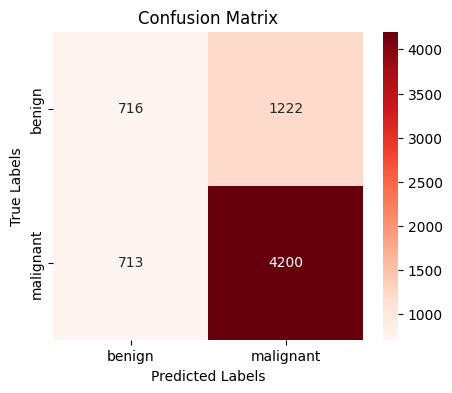

In [ ]:
import seaborn as sns
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm, class_names=['benign', 'malignant'])

#implementing resnet18

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# ResNet18 class that inherits from nn.Module
class Resnet18(nn.Module):
    def __init__(self, num_classes=2):
        super(Resnet18, self).__init__()

        # Load the pretrained ResNet18 model
        model_resnet18 = models.resnet18(pretrained=True)

        # Extract layers from pretrained model
        self.conv1 = model_resnet18.conv1       # initial convolutional layer
        self.bn1 = model_resnet18.bn1           # batch normalization layer
        self.relu = model_resnet18.relu         # ReLU activation function
        self.maxpool = model_resnet18.maxpool   # max pooling layer

        # ResNet blocks for feature extraction
        self.layer1 = model_resnet18.layer1
        self.layer2 = model_resnet18.layer2
        self.layer3 = model_resnet18.layer3
        self.layer4 = model_resnet18.layer4     # deeper layers for increasing depth of the network

        # Average pooling layer
        self.avgpool = model_resnet18.avgpool

        # Replace the fully connected layer for custom number of classes
        self._features = model_resnet18.fc.in_features
        self.fc = nn.Linear(self._features, num_classes)

    def forward(self, x):
        x = self.conv1(x)                       # apply convolutional layer
        x = self.bn1(x)                         # apply batch normalization
        x = self.relu(x)                        # apply ReLU activation
        x = self.maxpool(x)                     # apply max pooling
        x = self.layer1(x)                      # pass through ResNet layer 1
        x = self.layer2(x)                      # pass through ResNet layer 2
        x = self.layer3(x)                      # pass through ResNet layer 3
        x = self.layer4(x)                      # pass through ResNet layer 4
        x = self.avgpool(x)                     # apply average pooling
        x = x.view(x.size(0), -1)               # flatten for the fully connected layer
        x = self.fc(x)                          # apply fully connected layer for output
        return x

# Print the model architecture
if __name__ == "__main__":
    model1 = Resnet18(num_classes=2)
    #print(model1)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 178MB/s]


resnet18 training

In [ ]:
import torch.nn as nn
total_epochs = 50
lr = 0.01
momentum = 0.9
no_cuda = False
num_classes=2
log_interval = 10
l2_decay = 0.01
model = Resnet18(num_classes=num_classes)
model = model.to(device)
criterion = nn.CrossEntropyLoss()

In [ ]:
from torchvision.models import resnet18

# Initialize ResNet18 model
model = resnet18(pretrained=True)  # Load a pre-trained ResNet18
num_ftrs = model.fc.in_features    # Get the number of input features to the fully connected layer
model.fc = nn.Linear(num_ftrs, num_classes)  # Replace the fully connected layer for your specific task
model = model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Early stopping setup (implement EarlyStopping in your environment)
early_stop = EarlyStopping(patience=20, verbose=True)

# Project and model names
project_name = 'tumor_classification'
model_name = 'ResNet18'

best_accuracy = 0
model_save_dir = os.path.join('model', project_name, model_name)
os.makedirs(model_save_dir, exist_ok=True)

# Training loop
for epoch in range(1, total_epochs + 1):
    train(epoch, model, total_epochs, train_loader, criterion, l2_decay)
    with torch.no_grad():
        test_loss, accuracy, cm, auc = validation(model, val_loader)
    # Save the model if it achieves the best AUC
    model_dict = model.state_dict()
    if auc > best_accuracy:
        best_accuracy = auc
        torch.save(model_dict, os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'))
    early_stop(test_loss, model)
    if early_stop.early_stop:
        print("Early stopping")
        break



Epoch 2/50: 100%|██████████| 639/639 [01:18<00:00,  8.10batch/s]


train accuracy: 87.0558853149414%
Specificity: 1.0000, Sensitivity: 0.0010, AUC: 0.8515

Test set: Average loss: 0.6394, Accuracy: 73.25%

Validation loss decreased (inf --> 0.639401). Saving model ...


Epoch 3/50: 100%|██████████| 639/639 [01:19<00:00,  8.05batch/s]


train accuracy: 94.05403137207031%
Specificity: 1.0000, Sensitivity: 0.0111, AUC: 0.9451

Test set: Average loss: 0.3697, Accuracy: 87.38%

Validation loss decreased (0.639401 --> 0.369708). Saving model ...


Epoch 4/50: 100%|██████████| 639/639 [01:20<00:00,  7.98batch/s]


train accuracy: 95.8255844116211%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9266

Test set: Average loss: 0.4239, Accuracy: 84.62%

EarlyStopping counter: 1 out of 20


Epoch 5/50: 100%|██████████| 639/639 [01:17<00:00,  8.29batch/s]


train accuracy: 96.45198822021484%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8545

Test set: Average loss: 0.5771, Accuracy: 77.68%

EarlyStopping counter: 2 out of 20


Epoch 6/50: 100%|██████████| 639/639 [01:14<00:00,  8.52batch/s]


train accuracy: 97.27904510498047%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8505

Test set: Average loss: 0.5468, Accuracy: 76.87%

EarlyStopping counter: 3 out of 20


Epoch 7/50: 100%|██████████| 639/639 [01:18<00:00,  8.17batch/s]


train accuracy: 97.2398910522461%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9143

Test set: Average loss: 0.4178, Accuracy: 81.75%

EarlyStopping counter: 4 out of 20


Epoch 8/50: 100%|██████████| 639/639 [01:19<00:00,  8.05batch/s]


train accuracy: 97.53841400146484%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8669

Test set: Average loss: 0.5115, Accuracy: 78.33%

EarlyStopping counter: 5 out of 20


Epoch 9/50: 100%|██████████| 639/639 [01:20<00:00,  7.95batch/s]


train accuracy: 97.72438049316406%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9117

Test set: Average loss: 0.4347, Accuracy: 83.86%

EarlyStopping counter: 6 out of 20


Epoch 10/50: 100%|██████████| 639/639 [01:20<00:00,  7.93batch/s]


train accuracy: 97.54820251464844%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9003

Test set: Average loss: 0.5119, Accuracy: 82.35%

EarlyStopping counter: 7 out of 20


Epoch 11/50: 100%|██████████| 639/639 [01:21<00:00,  7.85batch/s]


train accuracy: 99.73573303222656%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9021

Test set: Average loss: 0.4736, Accuracy: 82.96%

EarlyStopping counter: 8 out of 20


Epoch 12/50: 100%|██████████| 639/639 [01:17<00:00,  8.28batch/s]


train accuracy: 99.91680908203125%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9088

Test set: Average loss: 0.4493, Accuracy: 84.11%

EarlyStopping counter: 9 out of 20


Epoch 13/50: 100%|██████████| 639/639 [01:16<00:00,  8.33batch/s]


train accuracy: 99.96084594726562%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9180

Test set: Average loss: 0.4122, Accuracy: 85.17%

EarlyStopping counter: 10 out of 20


Epoch 14/50: 100%|██████████| 639/639 [01:16<00:00,  8.32batch/s]


train accuracy: 99.98042297363281%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.8931

Test set: Average loss: 0.4911, Accuracy: 83.06%

EarlyStopping counter: 11 out of 20


Epoch 15/50: 100%|██████████| 639/639 [01:13<00:00,  8.64batch/s]


train accuracy: 99.99510955810547%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.8958

Test set: Average loss: 0.4745, Accuracy: 82.55%

EarlyStopping counter: 12 out of 20


Epoch 16/50: 100%|██████████| 639/639 [01:14<00:00,  8.60batch/s]


train accuracy: 99.9902114868164%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9164

Test set: Average loss: 0.4133, Accuracy: 85.52%

EarlyStopping counter: 13 out of 20


Epoch 17/50: 100%|██████████| 639/639 [01:14<00:00,  8.60batch/s]


train accuracy: 100.0%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9111

Test set: Average loss: 0.4263, Accuracy: 84.26%

EarlyStopping counter: 14 out of 20


Epoch 18/50: 100%|██████████| 639/639 [01:14<00:00,  8.57batch/s]


train accuracy: 99.99510955810547%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9035

Test set: Average loss: 0.4541, Accuracy: 84.06%

EarlyStopping counter: 15 out of 20


Epoch 19/50: 100%|██████████| 639/639 [01:17<00:00,  8.29batch/s]


train accuracy: 99.9902114868164%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9151

Test set: Average loss: 0.4163, Accuracy: 85.37%

EarlyStopping counter: 16 out of 20


Epoch 20/50: 100%|██████████| 639/639 [01:17<00:00,  8.21batch/s]


train accuracy: 99.9902114868164%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9044

Test set: Average loss: 0.4416, Accuracy: 84.16%

EarlyStopping counter: 17 out of 20


Epoch 21/50: 100%|██████████| 639/639 [01:18<00:00,  8.14batch/s]


train accuracy: 100.0%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9131

Test set: Average loss: 0.4198, Accuracy: 84.97%

EarlyStopping counter: 18 out of 20


Epoch 22/50: 100%|██████████| 639/639 [01:20<00:00,  7.96batch/s]


train accuracy: 100.0%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9098

Test set: Average loss: 0.4310, Accuracy: 84.77%

EarlyStopping counter: 19 out of 20


Epoch 23/50: 100%|██████████| 639/639 [01:18<00:00,  8.16batch/s]


train accuracy: 99.99510955810547%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.9183

Test set: Average loss: 0.4066, Accuracy: 85.72%

EarlyStopping counter: 20 out of 20
Early stopping


In [ ]:
# Save the model at the final epoch if early stopping is triggered
final_model_save_path = os.path.join(model_save_dir, f'{model_name}_final_epoch.pth')
torch.save(model.state_dict(), final_model_save_path, _use_new_zipfile_serialization=False)
print(f"Final model saved at: {os.path.abspath(final_model_save_path)}")


Final model saved at: /kaggle/working/model/tumor_classification/ResNet18/ResNet18_final_epoch.pth


resnet 18 testing

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import torch
import numpy as np
import torch.nn.functional as F

def test(model, test_loader):
    """
    Function to evaluate the model on the test dataset.

    Parameters:
    - model (torch.nn.Module): The trained model.
    - test_loader (DataLoader): DataLoader for the test dataset.

    Returns:
    - accuracy (float): Test accuracy in percentage.
    - test_loss (float): Average test loss.
    - auc_value (float): AUC score.
    """
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    correct = 0
    possibilities = None
    all_predictions = []
    all_targets = []

    # Iterate through the test DataLoader
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        test_output = model(data)  # Forward pass

        # Compute loss
        test_loss += F.nll_loss(F.log_softmax(test_output, dim=1), target, reduction='sum').item()

        # Get predictions
        pred = test_output.data.max(1)[1]
        all_predictions.extend(pred.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

        # Get probabilities for AUC calculation
        possibility = F.softmax(test_output, dim=1).cpu().data.numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)

        # Count correct predictions
        correct += pred.eq(target.data.view_as(pred)).sum().item()

    # Convert all predictions and targets to numpy arrays
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)

    # Classification metrics
    print(classification_report(all_targets, all_predictions, target_names=['benign', 'malignant'], digits=4))

    # Confusion matrix
    cm = confusion_matrix(all_targets, all_predictions)
    print("Confusion Matrix:\n", cm)

    # AUC score
    num_classes = possibilities.shape[1]
    label_onehot = np.eye(num_classes)[all_targets]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = roc_auc_score(label_onehot, possibilities, average="macro")

    # Average loss and accuracy
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(1 - fpr[0], tpr[0], auc_value))
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))

    return accuracy, test_loss, auc_value, fpr, tpr


In [ ]:
test_accuracy, test_loss, test_auc, fpr, tpr = test(model, test_loader)

              precision    recall  f1-score   support

      benign     0.6200    0.2147    0.3189      1938
   malignant     0.7537    0.9481    0.8398      4913

    accuracy                         0.7406      6851
   macro avg     0.6868    0.5814    0.5794      6851
weighted avg     0.7159    0.7406    0.6925      6851

Confusion Matrix:
 [[ 416 1522]
 [ 255 4658]]
Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.7190

Test set: Average loss: 0.8269, Accuracy: 5074/6851 (74.06%)



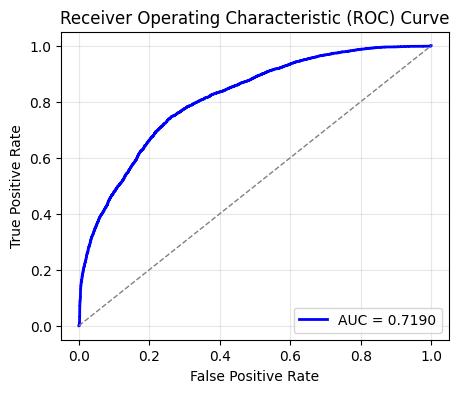

In [ ]:
import matplotlib.pyplot as plt

def plot_auc(fpr, tpr, auc_value):
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()
plot_auc(fpr, tpr, test_auc)

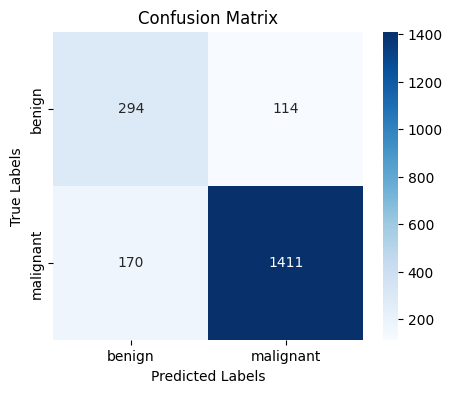

In [ ]:
import seaborn as sns

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(cm, class_names=['benign', 'malignant'])

#resnet50 model

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class resnet50(nn.Module):
    def __init__(self, num_classes=2):
        super(resnet50, self).__init__()

        # Load the pretrained ResNet50 model
        model_resnet50 = models.resnet50(pretrained=True)

        # Extract layers from the pretrained model
        self.conv1 = model_resnet50.conv1        # initial convolutional layer
        self.bn1 = model_resnet50.bn1            # batch normalization layer
        self.relu = model_resnet50.relu          # ReLU activation function
        self.maxpool = model_resnet50.maxpool    # max pooling layer

        # ResNet blocks for feature extraction
        self.layer1 = model_resnet50.layer1
        self.layer2 = model_resnet50.layer2
        self.layer3 = model_resnet50.layer3
        self.layer4 = model_resnet50.layer4      # deeper layers for increasing depth of the network

        # Average pooling layer
        self.avgpool = model_resnet50.avgpool

        # Replace the fully connected layer for custom number of classes
        self._features = model_resnet50.fc.in_features
        self.fc = nn.Linear(self._features, num_classes)

    def forward(self, x):
        x = self.conv1(x)                        # apply convolutional layer
        x = self.bn1(x)                          # apply batch normalization
        x = self.relu(x)                         # apply ReLU activation
        x = self.maxpool(x)                      # apply max pooling
        x = self.layer1(x)                       # pass through ResNet layer 1
        x = self.layer2(x)                       # pass through ResNet layer 2
        x = self.layer3(x)                       # pass through ResNet layer 3
        x = self.layer4(x)                       # pass through ResNet layer 4
        x = self.avgpool(x)                      # apply average pooling
        x = x.view(x.size(0), -1)                # flatten for the fully connected layer
        x = self.fc(x)                           # apply fully connected layer for output
        return x

# Print the model architecture
if __name__ == "__main__":
    model2 = resnet50(num_classes=2)
    #print(model2)


In [ ]:
import torch.nn as nn
total_epochs = 50
lr = 0.01
momentum = 0.9
no_cuda = False
num_classes=2
log_interval = 10
l2_decay = 0.01
model = resnet50(num_classes=num_classes)
model = model.to(device)
criterion = nn.CrossEntropyLoss()

In [ ]:
from torchvision.models import resnet50

# Initialize ResNet50 model
model = resnet50(pretrained=True)  # Load a pre-trained ResNet50
num_ftrs = model.fc.in_features    # Get the number of input features to the fully connected layer
model.fc = nn.Linear(num_ftrs, num_classes)  # Replace the fully connected layer for your specific task
model = model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Early stopping setup (implement EarlyStopping in your environment)
early_stop = EarlyStopping(patience=20, verbose=True)

# Project and model names
project_name = 'tumor_classification'
model_name = 'ResNet50'

best_accuracy = 0
model_save_dir = os.path.join('model', project_name, model_name)
os.makedirs(model_save_dir, exist_ok=True)

# Training loop
for epoch in range(1, total_epochs + 1):
    train(epoch, model, total_epochs, train_loader, criterion, l2_decay)
    with torch.no_grad():
        test_loss, accuracy, cm, auc = validation(model, val_loader)
    # Save the model if it achieves the best AUC
    model_dict = model.state_dict()
    if auc > best_accuracy:
        best_accuracy = auc
        torch.save(model_dict, os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'))
    early_stop(test_loss, model)
    if early_stop.early_stop:
        print("Early stopping")
        break
# Save the model at the final epoch if early stopping is triggered
final_model_save_path = os.path.join(model_save_dir, f'{model_name}_final_epoch.pth')
torch.save(model.state_dict(), final_model_save_path, _use_new_zipfile_serialization=False)
print(f"Final model saved at: {os.path.abspath(final_model_save_path)}")



Epoch 2/50: 100%|██████████| 639/639 [02:36<00:00,  4.08batch/s]


train accuracy: 86.9139633178711%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8513

Test set: Average loss: 0.5529, Accuracy: 75.11%

Validation loss decreased (inf --> 0.552876). Saving model ...


Epoch 3/50: 100%|██████████| 639/639 [02:35<00:00,  4.11batch/s]


train accuracy: 91.6952133178711%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8775

Test set: Average loss: 0.4440, Accuracy: 78.73%

Validation loss decreased (0.552876 --> 0.443954). Saving model ...


Epoch 4/50: 100%|██████████| 639/639 [02:31<00:00,  4.22batch/s]


train accuracy: 91.53372192382812%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8421

Test set: Average loss: 0.5380, Accuracy: 76.07%

EarlyStopping counter: 1 out of 20


Epoch 5/50: 100%|██████████| 639/639 [02:28<00:00,  4.29batch/s]


train accuracy: 92.8354721069336%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9130

Test set: Average loss: 0.3709, Accuracy: 81.50%

Validation loss decreased (0.443954 --> 0.370907). Saving model ...


Epoch 6/50: 100%|██████████| 639/639 [02:28<00:00,  4.29batch/s]


train accuracy: 93.51570892333984%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6146

Test set: Average loss: 1.0713, Accuracy: 59.63%

EarlyStopping counter: 1 out of 20


Epoch 7/50: 100%|██████████| 639/639 [02:27<00:00,  4.34batch/s]


train accuracy: 94.16168975830078%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8875

Test set: Average loss: 0.5882, Accuracy: 79.39%

EarlyStopping counter: 2 out of 20


Epoch 8/50: 100%|██████████| 639/639 [02:27<00:00,  4.33batch/s]


train accuracy: 93.98062133789062%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8523

Test set: Average loss: 0.5926, Accuracy: 76.57%

EarlyStopping counter: 3 out of 20


Epoch 9/50: 100%|██████████| 639/639 [02:26<00:00,  4.35batch/s]


train accuracy: 94.79788208007812%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9166

Test set: Average loss: 0.4207, Accuracy: 83.86%

EarlyStopping counter: 4 out of 20


Epoch 10/50: 100%|██████████| 639/639 [02:26<00:00,  4.36batch/s]


train accuracy: 94.91533660888672%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7946

Test set: Average loss: 0.7814, Accuracy: 73.20%

EarlyStopping counter: 5 out of 20


Epoch 11/50: 100%|██████████| 639/639 [02:26<00:00,  4.37batch/s]


train accuracy: 98.99187469482422%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8335

Test set: Average loss: 0.6837, Accuracy: 74.26%

EarlyStopping counter: 6 out of 20


Epoch 12/50: 100%|██████████| 639/639 [02:27<00:00,  4.35batch/s]


train accuracy: 99.68679809570312%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8461

Test set: Average loss: 0.6570, Accuracy: 76.12%

EarlyStopping counter: 7 out of 20


Epoch 13/50: 100%|██████████| 639/639 [02:26<00:00,  4.35batch/s]


train accuracy: 99.82872009277344%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8291

Test set: Average loss: 0.7117, Accuracy: 74.51%

EarlyStopping counter: 8 out of 20


Epoch 14/50: 100%|██████████| 639/639 [02:29<00:00,  4.28batch/s]


train accuracy: 99.85318756103516%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8142

Test set: Average loss: 0.7894, Accuracy: 72.10%

EarlyStopping counter: 9 out of 20


Epoch 15/50: 100%|██████████| 639/639 [02:32<00:00,  4.19batch/s]


train accuracy: 99.89723205566406%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.8332

Test set: Average loss: 0.7160, Accuracy: 75.31%

EarlyStopping counter: 10 out of 20


Epoch 16/50: 100%|██████████| 639/639 [02:33<00:00,  4.16batch/s]


train accuracy: 99.90702056884766%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8394

Test set: Average loss: 0.6747, Accuracy: 75.92%

EarlyStopping counter: 11 out of 20


Epoch 17/50: 100%|██████████| 639/639 [02:28<00:00,  4.30batch/s]


train accuracy: 99.9363784790039%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8091

Test set: Average loss: 0.8079, Accuracy: 71.24%

EarlyStopping counter: 12 out of 20


Epoch 18/50: 100%|██████████| 639/639 [02:27<00:00,  4.33batch/s]


train accuracy: 99.91191101074219%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8396

Test set: Average loss: 0.6782, Accuracy: 76.52%

EarlyStopping counter: 13 out of 20


Epoch 19/50: 100%|██████████| 639/639 [02:27<00:00,  4.33batch/s]


train accuracy: 99.91680908203125%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7977

Test set: Average loss: 0.8371, Accuracy: 70.04%

EarlyStopping counter: 14 out of 20


Epoch 20/50: 100%|██████████| 639/639 [02:27<00:00,  4.32batch/s]


train accuracy: 99.81403350830078%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8087

Test set: Average loss: 0.7207, Accuracy: 71.54%

EarlyStopping counter: 15 out of 20


Epoch 21/50: 100%|██████████| 639/639 [02:27<00:00,  4.34batch/s]


train accuracy: 99.9461669921875%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8558

Test set: Average loss: 0.6294, Accuracy: 75.52%

EarlyStopping counter: 16 out of 20


Epoch 22/50: 100%|██████████| 639/639 [02:28<00:00,  4.32batch/s]


train accuracy: 99.97553253173828%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8248

Test set: Average loss: 0.7349, Accuracy: 72.95%

EarlyStopping counter: 17 out of 20


Epoch 23/50: 100%|██████████| 639/639 [02:30<00:00,  4.26batch/s]


train accuracy: 99.97553253173828%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8447

Test set: Average loss: 0.6761, Accuracy: 75.01%

EarlyStopping counter: 18 out of 20


Epoch 24/50: 100%|██████████| 639/639 [02:27<00:00,  4.33batch/s]


train accuracy: 99.9559555053711%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8383

Test set: Average loss: 0.6953, Accuracy: 75.31%

EarlyStopping counter: 19 out of 20


Epoch 25/50: 100%|██████████| 639/639 [02:29<00:00,  4.28batch/s]


train accuracy: 99.96574401855469%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8217

Test set: Average loss: 0.7503, Accuracy: 72.90%

EarlyStopping counter: 20 out of 20
Early stopping
Final model saved at: /kaggle/working/model/tumor_classification/ResNet50/ResNet50_final_epoch.pth


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import torch
import numpy as np
import torch.nn.functional as F

def test(model, test_loader):
    """
    Function to evaluate the model on the test dataset.

    Parameters:
    - model (torch.nn.Module): The trained model.
    - test_loader (DataLoader): DataLoader for the test dataset.

    Returns:
    - accuracy (float): Test accuracy in percentage.
    - test_loss (float): Average test loss.
    - auc_value (float): AUC score.
    """
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    correct = 0
    possibilities = None
    all_predictions = []
    all_targets = []

    # Iterate through the test DataLoader
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        test_output = model(data)  # Forward pass

        # Compute loss
        test_loss += F.nll_loss(F.log_softmax(test_output, dim=1), target, reduction='sum').item()

        # Get predictions
        pred = test_output.data.max(1)[1]
        all_predictions.extend(pred.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

        # Get probabilities for AUC calculation
        possibility = F.softmax(test_output, dim=1).cpu().data.numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)

        # Count correct predictions
        correct += pred.eq(target.data.view_as(pred)).sum().item()

    # Convert all predictions and targets to numpy arrays
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)

    # Classification metrics
    print(classification_report(all_targets, all_predictions, target_names=['benign', 'malignant'], digits=4))

    # Confusion matrix
    cm = confusion_matrix(all_targets, all_predictions)
    print("Confusion Matrix:\n", cm)

    # AUC score
    num_classes = possibilities.shape[1]
    label_onehot = np.eye(num_classes)[all_targets]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = roc_auc_score(label_onehot, possibilities, average="macro")

    # Average loss and accuracy
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(1 - fpr[0], tpr[0], auc_value))
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))

    return test_loss, accuracy, cm, auc_value


resnet50 testing

In [ ]:
test_accuracy, test_loss, test_auc, fpr = test(model, test_loader)

              precision    recall  f1-score   support

      benign     0.5520    0.3617    0.4370      1938
   malignant     0.7784    0.8842    0.8279      4913

    accuracy                         0.7364      6851
   macro avg     0.6652    0.6229    0.6325      6851
weighted avg     0.7143    0.7364    0.7173      6851

Confusion Matrix:
 [[ 701 1237]
 [ 569 4344]]
Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.7018

Test set: Average loss: 0.8197, Accuracy: 5045/6851 (73.64%)



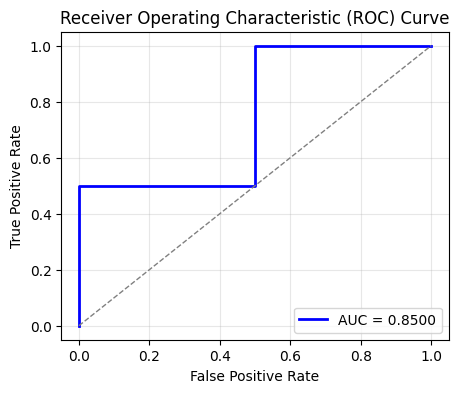

In [ ]:
import matplotlib.pyplot as plt

def plot_auc(fpr, tpr, auc_value):
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()
plot_auc(fpr, tpr, test_auc)


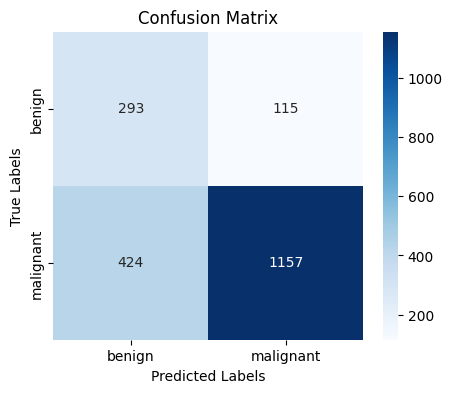

In [ ]:
import seaborn as sns

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(cm, class_names=['benign', 'malignant'])

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 30.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 106.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.2
    Uninstalling tomlkit-0.13.2:
      Successfully uninstalled tomlkit-0.13.2
  Attempting uninstall: python-multipart
    Found existing installation: python-multipart 0.0.9
    Uninstalling python-multipart-0.0.9:
      Successfully uninstalled python-multipart-0.0.9
  Attempting uninstall: starlette
    Found existing installation: starlette 0.37.2
    Uninstalling starlette-0.37.2:
      Successfully uninstalled starlette-0.37.2
  Attempting uninstall: fastapi
    Found existing installation: f

In [ ]:
import gradio as gr
from PIL import Image
import torch
import torch.nn as nn
from torchvision import models, transforms

# Load your trained model dynamically
def load_model(model_name, model_path):
    if model_name == "ResNet18":
        model = models.resnet18(pretrained=False)  # Use pretrained=False for your custom-trained models
        model.fc = nn.Linear(model.fc.in_features, 2)  # Binary classification
    elif model_name == "ResNet50":
        model = models.resnet50(pretrained=False)
        model.fc = nn.Linear(model.fc.in_features, 2)  # Binary classification
    elif model_name == "VGG16":
        model = models.vgg16(pretrained=False)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, 2)  # Binary classification
    else:
        raise ValueError("Invalid model name.")

    # Load your trained model weights
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()
    return model

# Preprocessing function for input images
def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension

# Prediction function
def predict(image, model_name):
    image = Image.fromarray(image)  # Convert numpy array to PIL image
    input_tensor = preprocess_image(image)

    # Map model names to weight file paths
    model_paths = {
        "ResNet18": "/kaggle/working/model/tumor_classification/ResNet18/ResNet18_final_epoch.pth",
        "ResNet50": "/kaggle/working/model/tumor_classification/ResNet50/ResNet50_final_epoch.pth",
        "VGG16": "/kaggle/working/model/tumor_classfication/vgg16/vgg16_final_epoch.pth"
    }

    model_path = model_paths[model_name]
    model = load_model(model_name, model_path)

    with torch.no_grad():
        outputs = model(input_tensor)
        probabilities = torch.softmax(outputs, dim=1)[0]

        # Extract class names and their respective probabilities
        benign_prob = probabilities[0].item()
        malignant_prob = probabilities[1].item()
        predicted_idx = probabilities.argmax().item()
        predicted_class = class_names[predicted_idx]

    # Create a response string
    response = (
        f"Predicted Class: {predicted_class}\n"
        f"Benign Probability: {benign_prob:.2f}\n"
        f"Malignant Probability: {malignant_prob:.2f}"
    )
    return response

# Define global variables
class_names = ["benign", "malignant"]  # Binary classes

# Define the Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Image(type="numpy", label="Upload Image"),
        gr.Dropdown(choices=["ResNet18","VGG16", "ResNet50"], label="Select Model")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Breast Cancer Classification",
    description="Upload an image and select a model to classify it as benign or malignant.",

)

# Launch the Gradio app
interface.launch()

* Running on local URL:  http://127.0.0.1:7860
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://b489701ac1bf2e4c34.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_30/1832902842.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

Created dataset file at: .gradio/flagged/dataset1.csv


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_30/1832902842.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function